In [ ]:
!kaggle datasets download -d marqui"s03/bdd100k"

Dataset URL: https://www.kaggle.com/datasets/marquis03/bdd100k
License(s): apache-2.0
100% 5.38G/5.38G [00:34<00:00, 295MB/s]
100% 5.38G/5.38G [00:34<00:00, 169MB/s]


In [ ]:
import zipfile

# Replace 'path/to/your/zipfile.zip' with the actual path to your ZIP file
with zipfile.ZipFile('/content/bdd100k.zip', 'r') as zip_ref:
    zip_ref.extractall()

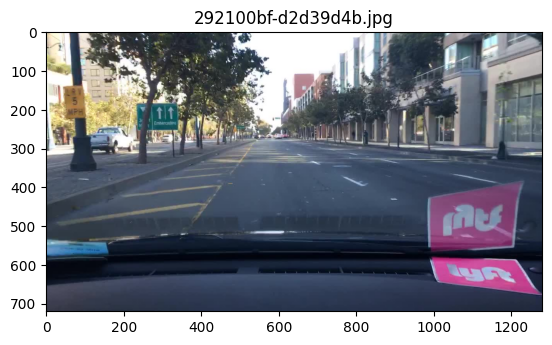

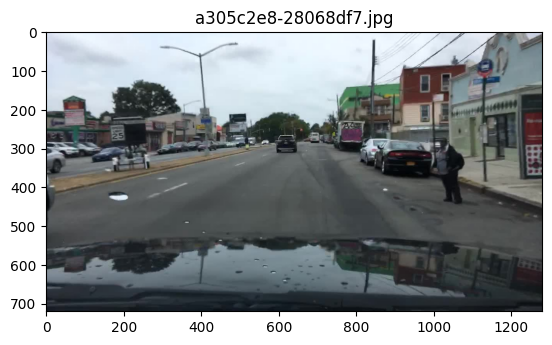

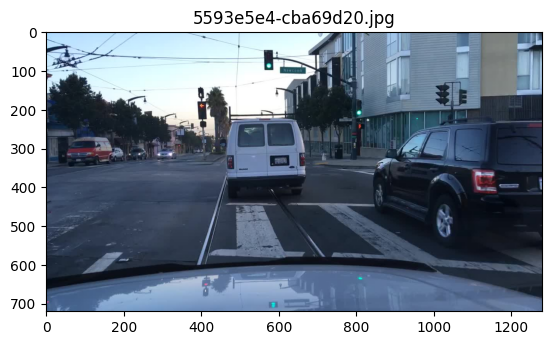

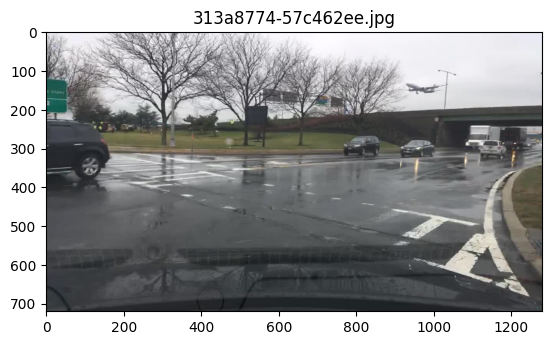

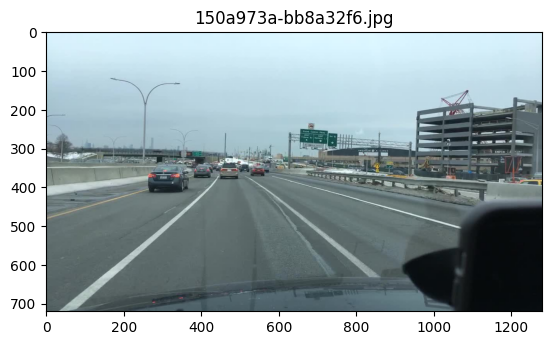

In [ ]:
import os
import matplotlib.pyplot as plt

# Replace 'path/to/your/images/directory' with the actual path to your images directory
image_dir = '/content/train/images'

# Get a list of image files
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]  # Assuming JPG format

# Display the first few images
for i in range(5):  # Display the first 5 images
    image_path = os.path.join(image_dir, image_files[i])
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(image_files[i])
    plt.show()

In [ ]:
import os
import csv
import random

def create_image_pairs(image_dir, num_pairs):
    """
    Creates pairs of random images from the specified directory and stores them in a CSV file.

    Args:
        image_dir: The path to the directory containing the images.
        num_pairs: The desired number of image pairs.

    Returns:
        None
    """

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    if len(image_files) < num_pairs * 2:
        raise ValueError("Insufficient number of images to create the desired number of pairs.")

    random.shuffle(image_files)

    pairs = []
    for i in range(0, len(image_files), 2):
        pair = (image_files[i], image_files[i + 1])
        pairs.append(pair)

    with open('image_pairs.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Image 1', 'Image 2'])
        writer.writerows(pairs)

    print(f"{num_pairs} image pairs created and stored in image_pairs.csv")

# Replace 'path/to/your/images/directory' with the actual path to your images directory
image_dir = '/content/train/images'

# Specify the desired number of image pairs
num_pairs = 10000

create_image_pairs(image_dir, num_pairs)

10000 image pairs created and stored in image_pairs.csv


100,000 images
BDD-100K mai 100,000 images hai so making the pairs of 10000 images, images might repeat, because random function is used


In [ ]:
import pandas as pd
df = pd.read_csv('/content/image_pairs.csv')
df.head()



,Image 1,Image 2
0,28270223-413668c1.jpg,7814206e-b6572c55.jpg
1,1f7ba5ab-fa498166.jpg,2c9f97e9-412f163a.jpg
2,69d8f653-b3464b0b.jpg,6679813d-6b40d020.jpg
3,940b86bb-b4ade66a.jpg,35b1e745-ed3b4883.jpg
4,9e87dbe5-bc577dc5.jpg,4cbb2473-229b00ea.jpg


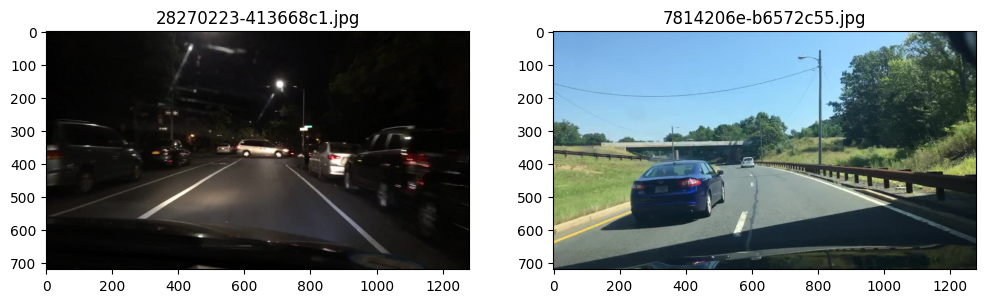

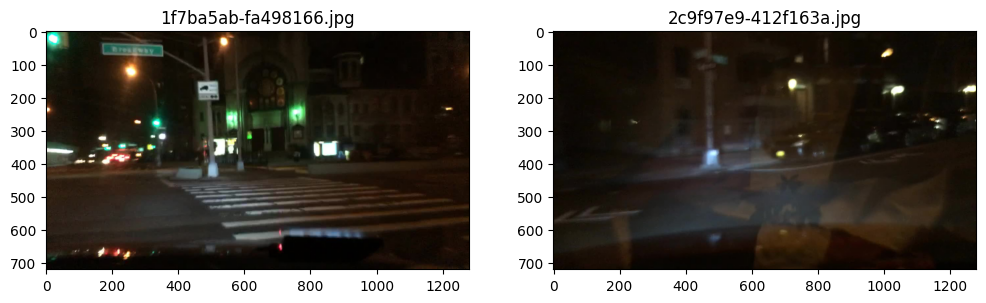

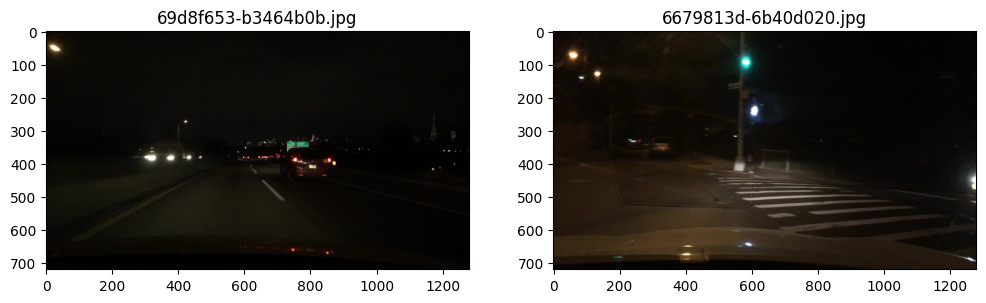

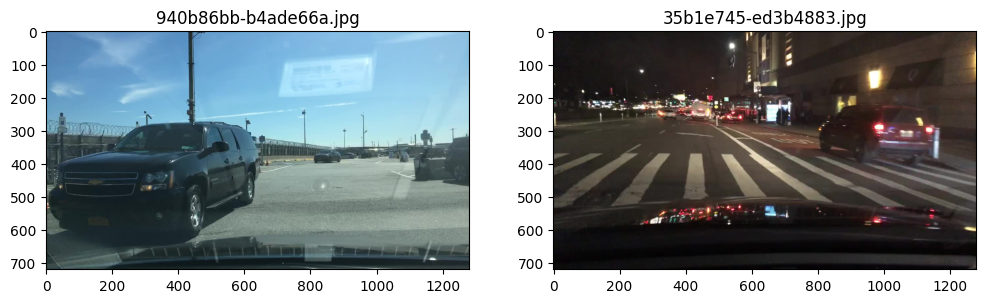

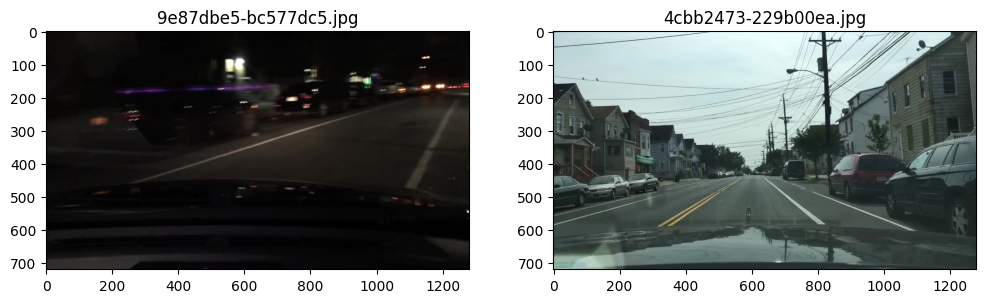

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV data
df = pd.read_csv('/content/image_pairs.csv')

# Image directory
image_dir = '/content/train/images'

# Display only the first 5 pairs
num_pairs_to_display = 5
for index, row in df.iterrows():
    if index >= num_pairs_to_display:
        break  # Stop iterating after displaying the desired number of pairs

    image_1 = row['Image 1']
    image_2 = row['Image 2']

    # Check if images exist in the directory
    image_1_path = os.path.join(image_dir, image_1)
    image_2_path = os.path.join(image_dir, image_2)

    if os.path.exists(image_1_path) and os.path.exists(image_2_path):
        # Display the images
        img1 = plt.imread(image_1_path)
        img2 = plt.imread(image_2_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.title(image_1)

        plt.subplot(1, 2, 2)
        plt.imshow(img2)
        plt.title(image_2)

        plt.show()

In [ ]:
# from transformers import AutoTokenizer, AutoModel, CLIPImageProcessor
# from PIL import Image
# import torch

# path = "OpenGVLab/InternVL-Chat-V1-1"
# model = AutoModel.from_pretrained(
#     path,
#     torch_dtype=torch.bfloat16,
#     low_cpu_mem_usage=True,
#     use_flash_attn=True,
#     trust_remote_code=True).eval().cuda()
# tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

# image_processor = CLIPImageProcessor.from_pretrained(path)
# image1 = Image.open('/content/pic1.jpg').resize((448, 448))
# pixel_values1 = image_processor(images=image1, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
# image2 = Image.open('/content/pic2.jpg').resize((448, 448))
# pixel_values2 = image_processor(images=image2, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
# pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)

# generation_config = dict(max_new_tokens=1024, do_sample=True)
# question = '<image>\nDescribe the two images in detail.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                history=None, return_history=True)
# print(f'User: {question}')
# print(f'Assistant: {response}')

# question = 'What are the similarities and differences between these two images.'
# response, history = model.chat(tokenizer, pixel_values, question, generation_config,
#                                history=history, return_history=True)
# print(f'User: {question}')
# print(f'Assistant: {response}')


In [ ]:
import os
import pandas as pd
import torch
from PIL import Image
from transformers import AutoTokenizer, AutoModel, CLIPImageProcessor

# Set up the model and tokenizer
path = "OpenGVLab/InternVL-Chat-V1-1"
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True, # isko try karo ek bar ki earger dalke
    trust_remote_code=True
).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)
image_processor = CLIPImageProcessor.from_pretrained(path)

# Image directory and CSV file
image_dir = '/content/train/images'
csv_file = '/content/image_pairs.csv'

# Load the CSV data
df = pd.read_csv(csv_file)

# List of detailed questions to ask for each image pair
questions = [
    "How many vehicles are present in the image, and what types are they (cars, trucks, motorcycles)?",
    "Are there any traffic lights, and what colors are they showing?",
    "How many lanes are visible on the road, and are they marked clearly?",
    "Are there any road signs, and what do they indicate (e.g., speed limit, pedestrian crossing)?",
    "What is the current weather condition in the image (e.g., sunny, rainy, foggy, snowy)?",
    "Is there any fog or mist present, and how dense is it?",
    "What actions are the pedestrians taking (e.g., walking, running, waiting)?",
    "Are any cyclists present, and are they using designated lanes?",
    "Is there a sidewalk or pedestrian pathway alongside the road?",
    "Are there any vehicles stopped at intersections or waiting at traffic lights?",
    "What time of day does the image appear to be (e.g., dawn, dusk, midday, night)?",
    "Are there any buildings visible, and what type are they (e.g., residential, commercial)?",
    "Are the vehicles evenly spaced, or is there congestion in certain areas?",
    "Are there any emergency vehicles (e.g., police cars, ambulances) in the image?"
]

# Output file to save the responses
output_file = 'detailed_image_analysis.txt'

# Loop through each pair of images in the CSV file
with open(output_file, 'w') as f:
    for index, row in df.iterrows():
        image_1 = row['Image 1']
        image_2 = row['Image 2']

        # Check if images exist in the directory
        image_1_path = os.path.join(image_dir, image_1)
        image_2_path = os.path.join(image_dir, image_2)

        if not (os.path.exists(image_1_path) and os.path.exists(image_2_path)):
            print(f"Skipping pair {index + 1}: {image_1} or {image_2} not found.")
            continue

        # Load and process the images
        image1 = Image.open(image_1_path).resize((448, 448))
        pixel_values1 = image_processor(images=image1, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
        image2 = Image.open(image_2_path).resize((448, 448))
        pixel_values2 = image_processor(images=image2, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
        pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)

        # Write the image pair to the output file
        f.write(f"Pair {index + 1}: {image_1} and {image_2}\n")

        # Iterate through each question
        history = None
        for question in questions:
            generation_config = dict(max_new_tokens=1024, do_sample=True)
            response, history = model.chat(tokenizer, pixel_values, question, generation_config, history=history, return_history=True)

            # Save the question and response to the output file
            f.write(f"User: {question}\n")
            f.write(f"Assistant: {response}\n\n")

        # Add a separator for better readability
        f.write("\n" + "="*50 + "\n")

        print(f"Processed Pair {index + 1}: {image_1} and {image_2}")

print("Detailed question processing complete. Responses saved to", output_file)


In [ ]:
import os
import pandas as pd
import torch
from PIL import Image
from transformers import AutoTokenizer, AutoModel, CLIPImageProcessor

# Set up the model and tokenizer
path = "OpenGVLab/InternVL-Chat-V1-1"
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True
).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)
image_processor = CLIPImageProcessor.from_pretrained(path)

# Image directory and CSV file
image_dir = '/content/train/images'
csv_file = '/content/image_pairs.csv'

# Load the CSV data
df = pd.read_csv(csv_file)

# Combine all the detailed questions into a single prompt
combined_prompt = (
    "How many vehicles are present in the image, and what types are they (cars, trucks, motorcycles)? "
    "Are there any traffic lights, and what colors are they showing? "
    "How many lanes are visible on the road, and are they marked clearly? "
    "Are there any road signs, and what do they indicate (e.g., speed limit, pedestrian crossing)? "
    "What is the current weather condition in the image (e.g., sunny, rainy, foggy, snowy)? "
    "Is there any fog or mist present, and how dense is it? "
    "What actions are the pedestrians taking (e.g., walking, running, waiting)? "
    "Are any cyclists present, and are they using designated lanes? "
    "Is there a sidewalk or pedestrian pathway alongside the road? "
    "Are there any vehicles stopped at intersections or waiting at traffic lights? "
    "What time of day does the image appear to be (e.g., dawn, dusk, midday, night)? "
    "Are there any buildings visible, and what type are they (e.g., residential, commercial)? "
    "Are the vehicles evenly spaced, or is there congestion in certain areas? "
    "Are there any emergency vehicles (e.g., police cars, ambulances) in the image?"
)

# Output file to save the responses
output_file = 'detailed_image_analysis.txt'

# Loop through each pair of images in the CSV file
with open(output_file, 'w') as f:
    for index, row in df.iterrows():
        image_1 = row['Image 1']
        image_2 = row['Image 2']

        # Check if images exist in the directory
        image_1_path = os.path.join(image_dir, image_1)
        image_2_path = os.path.join(image_dir, image_2)

        if not (os.path.exists(image_1_path) and os.path.exists(image_2_path)):
            print(f"Skipping pair {index + 1}: {image_1} or {image_2} not found.")
            continue

        # Load and process the images
        image1 = Image.open(image_1_path).resize((448, 448))
        pixel_values1 = image_processor(images=image1, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
        image2 = Image.open(image_2_path).resize((448, 448))
        pixel_values2 = image_processor(images=image2, return_tensors='pt').pixel_values.to(torch.bfloat16).cuda()
        pixel_values = torch.cat((pixel_values1, pixel_values2), dim=0)

        # Ask the combined question and get a response
        generation_config = dict(max_new_tokens=1024, do_sample=True)
        response, history = model.chat(tokenizer, pixel_values, combined_prompt, generation_config, return_history=True)

        # Save the response to the output file
        f.write(f"Pair {index + 1}: {image_1} and {image_2}\n")
        f.write(f"User: {combined_prompt}\n")
        f.write(f"Assistant: {response}\n\n")
        f.write("\n" + "="*50 + "\n")

        print(f"Processed Pair {index + 1}: {image_1} and {image_2}")

print("Detailed question processing complete. Responses saved to", output_file)
